<a href="https://colab.research.google.com/github/jrl309/Financial-Modeling-Course/blob/main/Copy_of_Assignment_2_(MSFO_833_Spring_2023)_jrl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

1. **Make a copy of this notebook** so you can edit and save your own version of it. Optionally update the notebook title to include your Group Number and/or the Net IDs of all group members. Do the work in your copy of the notebook. 

2. Edit the sharing settings: **share your notebook** publicly, so **"Anyone with the link can view"**. Notebooks not shared properly may be subject to late deductions if an instructor is unable to access them at the time of grading.

3. **Run the Setup Cells** in the "Setup" section.

4. **Complete the challenges**. For each challenge:
    + **Run any additional provided "Setup" cell(s)**, as necessary.
    + **Write Python code** to answer each of the provided questions. 






# Submission Instructions



To review your notebook / ensure it works as expected / prepare for evaluation: 
  1. Run it from scratch ("Runtime" > "Restart and run all"), provide any necessary user inputs, and verify you see the results you expect.


When you're done coding and your notebook reflects your final work product, follow BOTH these steps to submit:

  1. Download a copy of your notebook document in .ipynb format ("File" > "Download" > "Download .ipynb"). Then **upload the resulting .ipynb notebook file to Canvas**.
  2. Ensure your notebook sharing settings are open so "anyone with the link can view", then **submit your Colab Notebook URL via the [Submission Form](https://forms.gle/gWHLVjN2XVmqCogm7)**. 


> NOTE: only one member needs to submit on behalf of the group.

Thank you!

# Evaluation

Deliverables will be evaluated based on the criteria below:

Category | Weight | Description
--- | --- | ---
Challenge 1 | 22.5% | 
Challenge 2 | 22.5% | 
Challenge 3 | 22.5% | 
Challenge 4 | 22.5% | 
Chart Quality and Formatting | 10.0% | All charts should have a title, and axis labels. Strive to also format numbers with dollar signs or percent signs as applicable.

This rubric is tentative, and may be subject to adjustments during the grading process.

# Setup

## Imports

In [85]:
# RUN THIS CELL AND FEEL FREE TO MODIFY / UPDATE AS DESIRED

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt


## Helper Function (USD Formatting)



The function below can be used to convert a number into a dollar-sign formatted string. 

Run the cell, and feel free to use / invoke this function later as desired and applicable.

In [86]:
#
# SETUP CELL (RUN THIS CELL, AND DO NOT MODIFY)
#

def to_usd(my_price):
    """
        Converts a numeric value to USD-formatted string, for printing and display purposes.
        Adds dollar sign and commas for the thousands separator.
        Rounds to two decimal places. 
        
        Param: my_price (int or float or str) like 4000.444444 or "4000.444444"
        
        Example: to_usd(4000.444444)
        
        Returns: $4,000.44
    """
    return f"${float(my_price):,.2f}" 


In [87]:
# example invocations:
print(to_usd(4.5))
print(to_usd(1234567890.12345))

$4.50
$1,234,567,890.12


## Helper Function (PCT Formatting)

The function below can be used to convert a decimal number into a percent-sign formatted string. 

Run the cell, and feel free to use / invoke this function later as desired and applicable.

In [88]:
#
# SETUP CELL (RUN THIS CELL, AND DO NOT MODIFY)
#


def to_pct(my_number):
    """
        Formats a decimal number as a percentage, rounded to 2 decimal places, with a percent sign.
        
        Param my_number (float) like 0.95555555555
        
        Returns (str) like '95.56%'
    """
    return f"{(my_number * 100):.2f}%"




In [89]:
# example invocations:
print(to_pct(0.5))
print(to_pct(.955555555))

50.00%
95.56%


# Challenges

> NOTE: all challenges below adapted from material created by Prof. Ram Yamarthy (2021).


## 1) Tech Stocks and March 2020

The purpose of this exercise is to examine
the performance of prominent tech industry stocks over the course of 2020.


(a) Start by loading the dataset "techstocks.xlsx". How many columns are there? What **companies** are we looking at?

(b) If necessary, convert the `"Date"` column to a Pandas datetime object. Then **trim / filter** the dataset such that it starts after (i.e. all dates greater than) February 28, 2020. 

> NOTE: there should be `176` rows in the resulting dataset, with available dates ranging from `"2020-03-02"` to `"2020-11-06"`.


(c) Using the dataset from part (b) which represents March until the end of the dataset, calculate the **cumulative performance** of each ticker during this time period. 

> HINT: to compute the cumulative performance add 1 to all returns and take
the `product()` of all returns, over the relevant period.


(d) Re-filter the data so it includes only March and April, and re-calculate the  performance over this time period. What is the **performance of each ticker over March and April combined**? Which companies benefited the most from the shift in work conditions due to COVID? 

> NOTE: there should be `43` rows in the resulting COVID dataset, with available dates ranging from `"2020-03-02"` to `"2020-04-30"`

In [90]:
file_name = "techstocks.xlsx"
stocks_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
stocks_df.head()

,Date,MSFT,AMZN,AAPL,ZM,NFLX
0,2016-01-04,-0.012257,-0.057554,0.000855,NaN,-0.038643
1,2016-01-05,0.004562,-0.005024,-0.025059,NaN,-0.020917
2,2016-01-06,-0.018165,-0.001799,-0.019570,NaN,0.093071
3,2016-01-07,-0.034783,-0.039058,-0.042205,NaN,-0.026513
4,2016-01-08,0.003067,-0.001464,0.005288,NaN,-0.027671


In [91]:
px.line(stocks_df, x="Date", y=['MSFT', 'AMZN', 'AAPL', 'ZM', 'NFLX'],
            title= "Tech Stocks",
            labels={"value": "Stock Returns", "Date": "Month"}
        )

In [92]:
len(stocks_df)

1222

In [93]:
print(stocks_df)

           Date      MSFT      AMZN      AAPL        ZM      NFLX
0    2016-01-04 -0.012257 -0.057554  0.000855       NaN -0.038643
1    2016-01-05  0.004562 -0.005024 -0.025059       NaN -0.020917
2    2016-01-06 -0.018165 -0.001799 -0.019570       NaN  0.093071
3    2016-01-07 -0.034783 -0.039058 -0.042205       NaN -0.026513
4    2016-01-08  0.003067 -0.001464  0.005288       NaN -0.027671
...         ...       ...       ...       ...       ...       ...
1217 2020-11-02 -0.000691 -0.010431 -0.000827 -0.017162  0.017615
1218 2020-11-03  0.020264  0.014621  0.015354 -0.003289  0.006403
1219 2020-11-04  0.048249  0.063230  0.040837  0.071294  0.019970
1220 2020-11-05  0.031887  0.024942  0.035494  0.026938  0.033826
1221 2020-11-06  0.001926 -0.003200 -0.001136  0.006804  0.001888

[1222 rows x 6 columns]


In [94]:
stocks_df['Date']= pd.to_datetime(stocks_df['Date'])
print(stocks_df['Date'])

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
1217   2020-11-02
1218   2020-11-03
1219   2020-11-04
1220   2020-11-05
1221   2020-11-06
Name: Date, Length: 1222, dtype: datetime64[ns]


In [95]:
stocks_df[(stocks_df['Date'] > "2020-03-02") & (stocks_df['Date'] < "2020-11-06")]  

,Date,MSFT,AMZN,AAPL,ZM,NFLX
1047,2020-03-03,-0.047919,-0.023010,-0.031759,0.038547,-0.032227
1048,2020-03-04,0.036715,0.035013,0.046385,-0.005704,0.040730
1049,2020-03-05,-0.025095,-0.026217,-0.032437,0.070205,-0.028688
1050,2020-03-06,-0.028267,-0.011923,-0.013280,-0.085440,-0.010221
1051,2020-03-09,-0.067773,-0.052854,-0.079092,-0.004986,-0.060926
...,...,...,...,...,...,...
1216,2020-10-30,-0.010991,-0.054456,-0.056018,-0.058753,-0.056465
1217,2020-11-02,-0.000691,-0.010431,-0.000827,-0.017162,0.017615
1218,2020-11-03,0.020264,0.014621,0.015354,-0.003289,0.006403
1219,2020-11-04,0.048249,0.063230,0.040837,0.071294,0.019970


In [96]:
stocks_df.cumprod()
new_data = stocks_df.loc[:"Date"].shift(1)
print(new_data)

           Date      MSFT      AMZN      AAPL        ZM      NFLX
0           NaT       NaN       NaN       NaN       NaN       NaN
1    2016-01-04 -0.012257 -0.057554  0.000855       NaN -0.038643
2    2016-01-05  0.004562 -0.005024 -0.025059       NaN -0.020917
3    2016-01-06 -0.018165 -0.001799 -0.019570       NaN  0.093071
4    2016-01-07 -0.034783 -0.039058 -0.042205       NaN -0.026513
...         ...       ...       ...       ...       ...       ...
1217 2020-10-30 -0.010991 -0.054456 -0.056018 -0.058753 -0.056465
1218 2020-11-02 -0.000691 -0.010431 -0.000827 -0.017162  0.017615
1219 2020-11-03  0.020264  0.014621  0.015354 -0.003289  0.006403
1220 2020-11-04  0.048249  0.063230  0.040837  0.071294  0.019970
1221 2020-11-05  0.031887  0.024942  0.035494  0.026938  0.033826

[1222 rows x 6 columns]


In [97]:
new_date = stocks_df[(stocks_df['Date'] > "2020-03-02") & (stocks_df['Date'] < "2020-04-30")] 
stocks_df['Date']= pd.to_datetime(stocks_df['Date'])
print(new_date)

           Date      MSFT      AMZN      AAPL        ZM      NFLX
1047 2020-03-03 -0.047919 -0.023010 -0.031759  0.038547 -0.032227
1048 2020-03-04  0.036715  0.035013  0.046385 -0.005704  0.040730
1049 2020-03-05 -0.025095 -0.026217 -0.032437  0.070205 -0.028688
1050 2020-03-06 -0.028267 -0.011923 -0.013280 -0.085440 -0.010221
1051 2020-03-09 -0.067773 -0.052854 -0.079092 -0.004986 -0.060926
1052 2020-03-10  0.068384  0.050655  0.072022 -0.046242  0.050911
1053 2020-03-11 -0.045302 -0.037509 -0.034731  0.016684 -0.039025
1054 2020-03-12 -0.094838 -0.079221 -0.098755 -0.007525 -0.099080
1055 2020-03-13  0.142169  0.064648  0.119808 -0.018270  0.066772
1056 2020-03-16 -0.147390 -0.053697 -0.128647  0.003629 -0.111389
1057 2020-03-17  0.082337  0.070266  0.043970  0.030039  0.069971
1058 2020-03-18 -0.042096  0.012258 -0.024480  0.068497 -0.013385
1059 2020-03-19  0.016453  0.027831 -0.007662  0.042625  0.052493
1060 2020-03-20 -0.037559 -0.018523 -0.063486  0.054779  0.002409
1061 2020-

## 2) Industry Returns



The purpose of this exercise is to examine industry returns on a monthly basis and see which sectors display the greatest risks overall.

(a) Start by loading the "indreturns_french.xlsx" dataset. The data are monthly returns for 17 industries from Ken French’s website. Ensure the index column is a Pandas datetime object, as necessary. How far does the data set go back (i.e. what is the **earliest date**)?

(b) Compute the mean, standard deviation, and **Sharpe ratio** of monthly returns in each industry. You do not need to take into account risk free returns when computing Sharpes. Which five industries display the **highest Sharpe ratios**? What are they?

![](http://www.learnpythonwithrune.org/wp-content/uploads/2021/03/Skaermbillede-2021-03-18-kl.-08.51.48-1024x368.png)

(c) Using only returns starting from January of 1970, **re-compute the Sharpe ratios**. Are the industries that display the highest risk-adjusted returns, different than those identified in part (b)?


(d) Sharpe ratios are only one (crude) measure of measuring risk-adjusted returns. We can also examine how industries perform when the overall market is severely underperforming. Using data from the S&P 500, one can find that the worst five performing months (after 1970) are given by:

Date | Return
--- | ---
October 1987 | -21.8%
October 2008 | -16.9%
August 1998 | -14.6%
March 2020 | -12.5%
September 1974 | -11.9%
   
Examine the **returns for each industry in these five "bad" months**. Which industry (or industries) seem to be insulated against market crashes?

(e) **Explain, in words**, why the above form of analysis is a qualitative way of examining industry beta to the market?

In [98]:
file_name = "indreturns_french.xlsx"
industries_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
industries_df.head()

,Unnamed: 0,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
0,192607,0.48,3.78,-1.41,6.02,-1.62,8.46,1.42,2.31,4.07,8.77,3.79,17.43,1.83,7.04,0.13,-0.02,1.22
1,192608,2.91,0.69,3.60,0.15,-1.96,5.70,5.84,4.33,2.17,-5.56,2.35,3.96,4.54,-1.69,-0.68,4.47,3.11
2,192609,1.20,1.10,-3.68,0.26,0.24,5.48,1.21,-0.06,0.15,-4.13,-0.65,5.57,0.32,2.04,0.21,-1.61,1.82
3,192610,-3.06,-0.79,-1.02,0.37,-6.07,-4.76,0.69,-4.79,-3.85,-5.13,-3.29,-8.29,-2.90,-2.63,-2.26,-5.51,-0.88
4,192611,6.37,4.38,-0.01,2.22,-1.95,5.27,4.63,2.45,3.86,3.57,4.54,-0.28,2.19,3.71,6.44,2.34,1.38


In [99]:
# looks like "Unnamed: 0" has our time value in YYYYMM format
# ... consult the docs to find the format parameter:
# ... https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# ... https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

industries_df["Date"] = pd.to_datetime(industries_df["Unnamed: 0"], format="%Y%m")
industries_df[["Unnamed: 0", "Date"]].head()

,Unnamed: 0,Date
0,192607,1926-07-01
1,192608,1926-08-01
2,192609,1926-09-01
3,192610,1926-10-01
4,192611,1926-11-01


In [100]:
# add index for good measure, because each row represents a unique month
industries_df.index = industries_df["Date"]

In [101]:
# clean up by dropping the original column
industries_df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")
industries_df.head()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other,Date
Date,,,,,,,,,,,,,,,,,,
1926-07-01,0.48,3.78,-1.41,6.02,-1.62,8.46,1.42,2.31,4.07,8.77,3.79,17.43,1.83,7.04,0.13,-0.02,1.22,1926-07-01
1926-08-01,2.91,0.69,3.60,0.15,-1.96,5.70,5.84,4.33,2.17,-5.56,2.35,3.96,4.54,-1.69,-0.68,4.47,3.11,1926-08-01
1926-09-01,1.20,1.10,-3.68,0.26,0.24,5.48,1.21,-0.06,0.15,-4.13,-0.65,5.57,0.32,2.04,0.21,-1.61,1.82,1926-09-01
1926-10-01,-3.06,-0.79,-1.02,0.37,-6.07,-4.76,0.69,-4.79,-3.85,-5.13,-3.29,-8.29,-2.90,-2.63,-2.26,-5.51,-0.88,1926-10-01
1926-11-01,6.37,4.38,-0.01,2.22,-1.95,5.27,4.63,2.45,3.86,3.57,4.54,-0.28,2.19,3.71,6.44,2.34,1.38,1926-11-01


In [102]:
import pandas as pd

industries_df['Date']= pd.to_datetime(industries_df['Date'])
print(industries_df['Date'])

Date
1926-07-01   1926-07-01
1926-08-01   1926-08-01
1926-09-01   1926-09-01
1926-10-01   1926-10-01
1926-11-01   1926-11-01
                ...    
2021-05-01   2021-05-01
2021-06-01   2021-06-01
2021-07-01   2021-07-01
2021-08-01   2021-08-01
2021-09-01   2021-09-01
Name: Date, Length: 1143, dtype: datetime64[ns]


In [103]:
import pandas as pd
import numpy as npy
import warnings
warnings.filterwarnings('ignore')

print(industries_df.head(5))
print(" ")

print("Average Returns by Industry:")
print(' ')
print("Mean by Industry")
print(" ")
print(industries_df.mean())
print("Standard Deviation")
print(industries_df.std())
print(' ')
print("Sharpe Ratio")
sharpe_ratio = industries_df.mean()/industries_df.std()
print(sharpe_ratio)


            Food   Mines  Oil    Clths  Durbl  Chems  Cnsum  Cnstr  Steel  \
Date                                                                        
1926-07-01   0.48   3.78  -1.41   6.02  -1.62   8.46   1.42   2.31   4.07   
1926-08-01   2.91   0.69   3.60   0.15  -1.96   5.70   5.84   4.33   2.17   
1926-09-01   1.20   1.10  -3.68   0.26   0.24   5.48   1.21  -0.06   0.15   
1926-10-01  -3.06  -0.79  -1.02   0.37  -6.07  -4.76   0.69  -4.79  -3.85   
1926-11-01   6.37   4.38  -0.01   2.22  -1.95   5.27   4.63   2.45   3.86   

            FabPr  Machn  Cars   Trans  Utils  Rtail  Finan  Other       Date  
Date                                                                           
1926-07-01   8.77   3.79  17.43   1.83   7.04   0.13  -0.02   1.22 1926-07-01  
1926-08-01  -5.56   2.35   3.96   4.54  -1.69  -0.68   4.47   3.11 1926-08-01  
1926-09-01  -4.13  -0.65   5.57   0.32   2.04   0.21  -1.61   1.82 1926-09-01  
1926-10-01  -5.13  -3.29  -8.29  -2.90  -2.63  -2.26  -5.51 

In [104]:
new_date_sharpe = industries_df[(industries_df['Date'] > "1970-01-01") & (industries_df['Date'] < "2022-04-30")] 

import pandas as pd
import numpy as npy
###import yfinance as yf 
import warnings
warnings.filterwarnings('ignore')

print(new_date_sharpe.head(5))
print(" ")

print("Average Returns by Industry:")
print(' ')
print("Mean by Industry")
print(" ")
print(new_date_sharpe.mean())
print("Standard Deviation")
print(industries_df.std())
print(' ')
print("Sharpe Ratio By Industry")
sharpe_ratio = new_date_sharpe.mean()/new_date_sharpe.std()
print(sharpe_ratio)

###rf = yf.download("TNX", start = "1990-11-25" , end = "2022-07-15") I wanted to load 10-year Treasury Data from th yfinance API, but it doesn't load within colab, although it works in Jupyter 

risk_free_name = "TLT.xlsx"
rf_df = pd.read_excel("TLT.xlsx")
rf_df.head()

sharper = new_date_sharpe.sum() 
sharper_2 = sharper.mean()/sharper.std()
print(' ')
print("Portfolio Sharpe Ratio")
print(sharper_2)


            Food   Mines  Oil    Clths  Durbl  Chems  Cnsum  Cnstr  Steel  \
Date                                                                        
1970-02-01   5.57   7.12   4.64   4.02  -0.25   3.65   4.39   8.40  11.01   
1970-03-01  -0.91  -1.69  -0.04  -0.06  -0.49   0.84  -3.58  -1.48   0.81   
1970-04-01 -10.04 -13.51  -9.45 -11.21  -8.90  -3.87  -8.99 -10.95  -9.43   
1970-05-01  -7.15  -2.52   2.82 -10.25  -9.80  -2.68  -5.28  -9.09  -9.37   
1970-06-01  -0.94  -1.41  -2.76  -4.89  -5.52  -1.11  -0.26  -6.55  -6.48   

            FabPr  Machn  Cars   Trans  Utils  Rtail  Finan  Other       Date  
Date                                                                           
1970-02-01   4.39   3.28   8.19   8.56   8.36   5.49  11.35   7.24 1970-02-01  
1970-03-01   1.50  -1.23   6.04  -3.16   2.91  -1.49  -0.76  -0.90 1970-03-01  
1970-04-01 -10.59 -12.89  -8.15 -12.88  -8.06 -10.46 -12.81 -11.55 1970-04-01  
1970-05-01  -9.68  -9.33  -5.45  -7.77  -5.36  -9.35  -8.37 

In [105]:
rf_df.head()
rf_df.tail()

rf_df["10_Year_Avg"] = rf_df["Adj Close"] / rf_df["Adj Close"].shift(1)

sharper = new_date_sharpe.sum() - 4.55    #rf_df['10_Year_Avg']
sharper_2 = sharper.mean()/sharper.std()
print(' ')
print("Portfolio Sharpe Ratio")
print(sharper_2)


 
Portfolio Sharpe Ratio
10.530690457566424


In [106]:

# industries = [
#     'Food ', 'Mines', 'Oil  ', 'Clths', 'Durbl', 'Chems', 'Cnsum', 
#     'Cnstr', 'Steel', 'FabPr', 'Machn', 'Cars ', 'Trans', 'Utils', 
#     'Rtail', 'Finan', 'Other'
# ]






In [107]:

bad_months = ('1987-10-01','2008-10-01','1998-08-01','2020-03-01','1974-09-01')





## 3) International Growth Rates

The purpose of this exercise is to examine
economic growth rates of major countries in Africa, Europe, and North America. 

Start by loading the "countryGDP.xlsx" dataset, which reports cross-country Real GDP data in USD, taken from the World Bank.

(a) **Trim / filter** the data set, such that the starting year contains data across all 9 countries, which should be 1970.

(b) After doing so, compute a **growth rate index** for each country such that the value in 1970 is 1.0, and it grows cumulatively based on the country’s growth in real
GDP.

> HINT: after computing the growth rate from year to year use the `cumprod()` method


Plot a **line chart of the growth rate index**. The chart should have nine lines total (one line per country).
 
(c) To compare countries within the same continent as eachother, also
plot **three continent-specific line charts of the growth rate index**. Each chart should have three lines total (one line per country in that continent).

> NOTE: if you are using matplotlib as your desired charting library, instead of making three different charts, you are encouraged to use **subplots**, where we have a subplot for each continent, instead of a separate chart for each continent.

(d) Which three countries experienced the **largest cumulative growth rates** from 1970 through 2019, and what are their growth rates?

In [108]:
file_name = "countryGDP.xlsx"
gdp_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
gdp_df.head()
gdp_df.tail()

,Year,USA,CAN,MEX,GBR,FRA,DEU,NGA,EGY,ZAF
55,2015,1.821930e+13,1.556130e+12,1.170565e+12,2.928591e+12,2.438208e+12,3.360550e+12,4.945832e+11,3.326980e+11,3.176205e+11
56,2016,1.870719e+13,1.528243e+12,1.077904e+12,2.694283e+12,2.471286e+12,3.466790e+12,4.046495e+11,3.329278e+11,2.963573e+11
57,2017,1.948539e+13,1.649878e+12,1.157736e+12,2.666229e+12,2.595151e+12,3.665804e+12,3.757455e+11,2.353691e+11,3.495541e+11
58,2018,2.052905e+13,1.716263e+12,1.220699e+12,2.860668e+12,2.787864e+12,3.949549e+12,3.981604e+11,2.508948e+11,3.682889e+11
59,2019,2.137442e+13,1.736426e+12,1.258287e+12,2.827113e+12,2.715518e+12,3.845630e+12,4.481204e+11,3.031751e+11,3.514316e+11


In [109]:

# use these if helpful:


# countries = ["USA", "CAN", "MEX", "GBR", "FRA", "DEU", "NGA", "EGY", "ZAF"]


# continents_map = {
#     "North America": ["USA", "CAN", "MEX"],
#     "Europe": ["GBR", "FRA", "DEU"], 
#     "Africa": ["NGA", "EGY", "ZAF"]
# }



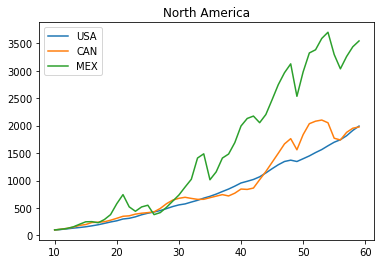

In [110]:
gdp_df.index

gdp_df = gdp_df[gdp_df['Year'] >= 1970]
gdp_df.head()

usd_price = gdp_df.USA.iloc[0]
usd_normal = gdp_df.USA.div(usd_price).mul(100)
usd_normal.plot(legend="USD", title = "North America")

can_price = gdp_df.CAN.iloc[0]
can_normal = gdp_df.CAN.div(can_price).mul(100)
can_normal.plot(legend="CAN")

mex_price = gdp_df.MEX.iloc[0]
mex_normal = gdp_df.MEX.div(mex_price).mul(100)
mex_normal.plot(legend="MEX")




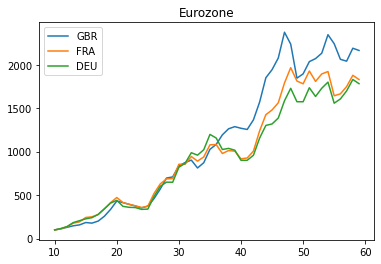

In [111]:
gbr_price = gdp_df.GBR.iloc[0]
gbr_normal = gdp_df.GBR.div(gbr_price).mul(100)
gbr_normal.plot( x= "Year", y ="gbr_normal", legend="GBR", title = "Eurozone")

fra_price = gdp_df.FRA.iloc[0]
fra_normal = gdp_df.FRA.div(fra_price).mul(100)
fra_normal.plot(legend="FRA")

deu_price = gdp_df.DEU.iloc[0]
deu_normal = gdp_df.DEU.div(deu_price).mul(100)
deu_normal.plot(legend="DEU")

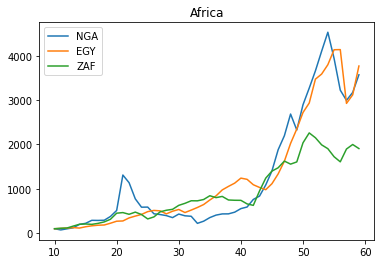

In [112]:
#     "Africa": ["NGA", "EGY", "ZAF"]

nga_price = gdp_df.NGA.iloc[0]
nga_normal = gdp_df.NGA.div(nga_price).mul(100)
nga_normal.plot(legend="NGA", title = "Africa")

egy_price = gdp_df.EGY.iloc[0]
egy_normal = gdp_df.EGY.div(egy_price).mul(100)
egy_normal.plot(legend="EGY")

zaf_price = gdp_df.ZAF.iloc[0]
zaf_normal = gdp_df.ZAF.div(zaf_price).mul(100)
zaf_normal.plot(legend="ZAF")


## 4) Large Firms and Profit Growth



This exercise uses the datasets "compuannual_clean.xlsx" and "topfirm_id.xlsx". All data cleaning and quality checks have already been performed. See the partial data dictionary below for more information about the columns in the Compustat dataset.

Load both datasets. 

> NOTE: loading the Compustat dataset may take a minute or two, as this is a large dataset

If necessary, use the `pd.to datetime()` function to convert the `"datadate"` column in the Compustat data to a date-time object.




(a) The topfirm id dataset contains the identifiers of the 250 largest firms that have been active from 1990 to present. What are the names of the **top five companies by asset size** (`"at"`)?


(b) Using the 6-digit CUSIPs from the topfirm id dataset, select all rows in the
Compustat data that pertain to these 250 firms (each one of these firms will
roughly have data from 1990 – 2019). Store these **data pertaining to the largest firms** in a new dataframe.

> HINT: consider using the `isin()` method

> NOTE: once you select the appropriate rows, there may be an additional company (General Motors Financial) that shows up in the new data frame, because it has the same CUSIP as General Motors. Don’t worry about this.

(c) Sort this data frame by `"cusip6"` and `"fyear"`. Within this new data frame, compute the **growth in profits** (`"ebitda"`) year over year, for each firm. You should not need to use a for loop. Profit growth at any point in time is computed as a percentage growth rate:

<img width="412" alt="Screenshot 2023-01-12 at 11 34 56 PM" src="https://user-images.githubusercontent.com/1328807/212238422-314ecf5e-f783-4e52-ab09-3e5805867126.png">


(d) **Compute three series** by fiscal year: 
   1. median profit growth, 
   2. the 25 percentile value of profit growth and  
   3. the 75 percentile value of profit growth. 
   
> NOTE: each one of these series should have a data point each fiscal year. 

> HINT: consider using the `groupby()` method

(e) **Plot the three series** from 1991 – 2019. Ideally format the chart such that the interquartile range (25% through 75% values) shows up as a shaded grey area, and the median is a solid line on top.

Given our knowledge of past events, does the chart look reasonable?



### Top Firms Dataset

In [113]:
file_name = "topfirm_id.xlsx"
firms_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
firms_df.head()

,fyear,conm,cusip6,at
0,1990,GENERAL MOTORS CO,37045V,180236.5
1,1990,FORD MOTOR CO,345370,173662.7
2,1990,GENERAL ELECTRIC CO,369604,153884.0
3,1990,AMERICAN EXPRESS CO,025816,137682.0
4,1990,FEDERAL NATIONAL MORTGA ASSN,313586,133113.0


### Compustat Dataset



[Source](https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-annual/)


The [CUSIP](https://www.investor.gov/introduction-investing/investing-basics/glossary/cusip-number) is a unique identifier for companies. We'll focus on a 6 digit version of this identifier.

Here are descriptions of some of the remaining columns in this dataset:

Variable Name | Type | Description
-- | -- | --
DATADATE |   |  
DATAFMT |   |  
GVKEY | string | GVKEY -- Global Company Key (GVKEY)
CONM | string | Company Name (CONM)
TIC | string | Ticker Symbol (TIC)
CUSIP | string | CUSIP (CUSIP)
CUSIP-6 |   |  
FYEAR |   |  
LOC | string | LOC -- Current ISO Country Code - Headquarters (LOC)
CITY | string | CITY -- City (CITY)
CURNCD | string | CURNCD -- Native Currency Code (CURNCD)
ACT | double | ACT -- Current Assets - Total (ACT)
AT | double | AT -- Assets - Total (AT)
CHE | double | CHE -- Cash and Short-Term Investments (CHE)
DD1 | double | DD1 -- Long-Term Debt Due in One Year (DD1)
DLTT | double | DLTT -- Long-Term Debt - Total (DLTT)
EBITDA | double | EBITDA -- Earnings Before Interest (EBITDA)
MKVALT | double | MKVALT -- Market Value - Total - Fiscal (MKVALT)
REVT | double | REVT -- Revenue - Total (REVT)
SALE | double | SALE -- Sales/Turnover (Net) (SALE)
CONSOL |   |  
COSTAT |   |  
CURCD |   |  
INDFMT |   |  
POPSRC |   |  
SIC |   |  


Large dataset takes two minutes to load!

In [114]:
%%time

file_name = "compuannual_clean.xlsx"
comp_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
comp_df.head()

CPU times: user 2min 2s, sys: 642 ms, total: 2min 3s
Wall time: 2min 3s


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,dltt,ebitda,revt,sale,costat,mkvalt,city,loc,sic,cusip6
0,1003,1990-01-31,1989,INDL,C,D,STD,ANTQ,000354100,A.A. IMPORTING CO INC,...,0.076,-1.532,19.267,19.267,I,NaN,St. Louis,USA,5712,000354
1,15433,1990-01-31,1989,INDL,C,D,STD,6020B,002880102,ABCO MARKETS INC,...,78.075,9.903,707.673,707.673,I,NaN,Phoenix,USA,5411,002880
2,1083,1990-01-31,1989,INDL,C,D,STD,3ACAJC,003870300,ACA JOE INC,...,0.227,-7.456,11.274,11.274,I,NaN,BRISBANE,USA,5600,003870
3,23498,1990-01-31,1989,INDL,C,D,STD,3ACQGE,004926408,ACQUA GROUP INC,...,0.135,-0.305,1.553,1.553,I,NaN,VAN NUYS,USA,3585,004926
4,13171,1990-01-31,1989,INDL,C,D,STD,ADMR.,007093305,ADMAR GROUP INC,...,0.602,0.945,10.192,10.192,I,NaN,Santa Ana,USA,6411,007093


In [115]:
# https://stackoverflow.com/questions/54322342/pandas-groupby-and-calculate-percentage-change


In [116]:
# https://stackoverflow.com/questions/27302220/pandas-pivot-table-percentile-quantile/74902594#74902594
#
# consider this example of how to apply multiple agg functions to a given column, if helpful:
#
# pd.pivot_table(some_df, 
#    index="col_a", 
#    values="col_b", 
#    aggfunc={'col_b': [min, max, np.mean, np.median, quantile_25, quantile_75]}
# ) 

# use if helpful:

def quantile_25(my_vals):
    """Param my_vals : a pd.Series of numeric values"""
    return my_vals.quantile(.25)

def quantile_75(my_vals):
    """Param my_vals : a pd.Series of numeric values"""
    return my_vals.quantile(.75)





In [117]:
comp_df.dtypes

gvkey                int64
datadate    datetime64[ns]
fyear                int64
indfmt              object
consol              object
popsrc              object
datafmt             object
tic                 object
cusip               object
conm                object
curcd               object
act                float64
at                 float64
che                float64
dd1                float64
dltt               float64
ebitda             float64
revt               float64
sale               float64
costat              object
mkvalt             float64
city                object
loc                 object
sic                  int64
cusip6              object
dtype: object

In [118]:
firms_df.sort_values(by="at", ascending=False, inplace=True)
print('Five largest companies: ')
firms_df.head()

Five largest companies: 


,fyear,conm,cusip6,at
0,1990,GENERAL MOTORS CO,37045V,180236.5
1,1990,FORD MOTOR CO,345370,173662.7
2,1990,GENERAL ELECTRIC CO,369604,153884.0
3,1990,AMERICAN EXPRESS CO,025816,137682.0
4,1990,FEDERAL NATIONAL MORTGA ASSN,313586,133113.0


In [120]:
firms_df.sort_values(by=["cusip6", "fyear"], ascending=False)
print("sorted by Cusip", " ", "&", "Year")

firms_df.pivot_table(columns=['fyear', 'cusip6'], aggfunc=lambda x: np.percentile(x, 25))



sorted by Cusip   & Year


fyear       1990                                                           \
cusip6    001055   00206R    002824  009158    010392    017175    02005N   
at      8034.832  22195.5  5563.151  3899.5  7441.559  4228.068  105103.0   

fyear                             ...                                  \
cusip6   02209S  023164   023608  ...     931142    938824     949746   
at      46569.0  6320.0  5702.34  ...  11388.915  2650.586  36878.199   

fyear                                                                    
cusip6     962166  963320  969457    976656    98389B   98421M   989701  
at      16355.819  5614.0  4034.4  2972.903  4762.297  31495.0  3559.07  

[1 rows x 250 columns]